<a href="https://colab.research.google.com/github/mnocerino23/NBA-Player-Classifier/blob/main/NBA_classifiers_4classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [425]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [426]:
nba_train = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/nba_train.csv')
nba_test = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/nba_test.csv')

In [427]:
nba_train.shape

(314, 52)

In [428]:
nba_test.shape

(79, 52)

# Grouping Players into classes based on their salary


1.   Low Level Player (Earn below 6 million)
2.   Average Player (Earn 6-12 million)
3.   Quality Player (Earn 12-20 million)
4.   Max Player (Earn 20+ million)




In [429]:
nba_train['class'] = ''
for index, row in nba_train.iterrows():
  if nba_train.at[index,'Salary'] <= 6:
    nba_train.at[index,'class'] = 'Low Level Player'
  elif nba_train.at[index,'Salary'] > 6 and nba_train.at[index,'Salary'] <= 12:
    nba_train.at[index,'class'] = 'Average Player'
  elif nba_train.at[index, 'Salary'] > 12 and nba_train.at[index,'Salary'] <= 20:
    nba_train.at[index,'class'] = 'Quality Player'
  elif nba_train.at[index,'Salary']> 20:
    nba_train.at[index,'class'] = 'Max Player'

In [430]:
print(nba_train['class'].value_counts())

Low Level Player    170
Average Player       55
Quality Player       45
Max Player           44
Name: class, dtype: int64


In [431]:
nba_test['class'] = ''
for index, row in nba_test.iterrows():
  if nba_test.at[index,'Salary'] <= 6:
    nba_test.at[index,'class'] = 'Low Level Player'
  elif nba_test.at[index,'Salary'] > 6 and nba_test.at[index,'Salary'] <= 12:
    nba_test.at[index,'class'] = 'Average Player'
  elif nba_test.at[index, 'Salary'] > 12 and nba_test.at[index,'Salary'] <= 20:
    nba_test.at[index,'class'] = 'Quality Player'
  elif nba_test.at[index,'Salary'] > 20:
    nba_test.at[index,'class'] = 'Max Player'

In [432]:
print(nba_test['class'].value_counts())

Low Level        38
Max Level        16
Average Level    15
Mid Level        10
Name: class, dtype: int64


In [433]:
nba_train = nba_train.drop(['Salary'], axis = 1)
nba_test = nba_test.drop(['Salary'], axis = 1)

In [434]:
nba_train_features = nba_train.drop(['class'], axis = 1)
nba_train_target = nba_train['class']

nba_test_features = nba_test.drop(['class'], axis = 1)
nba_test_target = nba_test['class']

In [435]:
print('Train:')
print('train_features dimensions: ', nba_train_features.shape)
print('train_target dimensions: ', nba_train_target.shape, '\n')


print('Test:')
print('test_features dimensions: ', nba_test_features.shape)
print('test_target dimensions: ', nba_test_target.shape)

Train:
train_features dimensions:  (314, 51)
train_target dimensions:  (314,) 

Test:
test_features dimensions:  (79, 51)
test_target dimensions:  (79,)


In [436]:
print(nba_train_features.columns)

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'pos_C', 'pos_PF',
       'pos_PG', 'pos_SF', 'pos_SG'],
      dtype='object')


# K-Nearest-Neighbours Classifier

In [437]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=9, metric = 'manhattan')
cv = cross_val_score(knn, nba_train_features, nba_train_target, cv = 6)
print(cv)
print(cv.mean())

[0.77358491 0.67924528 0.67307692 0.69230769 0.65384615 0.65384615]
0.6876511852926948


# Support Vector Machine Classifier

In [438]:
from sklearn import svm
from sklearn.svm import SVC

# Naive Bayes Classifier

In [439]:
from sklearn.naive_bayes import GaussianNB

In [440]:
gnb = GaussianNB()
cv = cross_val_score(gnb, nba_train_features, nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.68253968 0.71428571 0.57142857 0.57142857 0.59677419]
0.6272913466461854


# Decision Tree Classifier


In [441]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [442]:
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, nba_train_features, nba_train_target, cv =5)
print(cv)
print(cv.mean())

[0.61904762 0.65079365 0.6031746  0.58730159 0.61290323]
0.6146441372247824


# Random Forest Classifier

In [443]:
from sklearn.ensemble import RandomForestClassifier

In [444]:
rf = RandomForestClassifier()
cv = cross_val_score(rf, nba_train_features, nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.73015873 0.65079365 0.65079365 0.65079365 0.66129032]
0.6687660010240655


# Gradient Boost Classifier

In [445]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
cv = cross_val_score(gb, nba_train_features, nba_train_target, cv = 5)
print(cv)
print(cv.mean())

[0.6984127  0.73015873 0.6984127  0.66666667 0.67741935]
0.6942140296979005


# Neural Network Classifiers

In [446]:
#encode the target variable
train_target = pd.get_dummies(nba_train['class'])
test_target = pd.get_dummies(nba_test['class'])

In [447]:
print(train_target.shape)
print(test_target.shape)

(314, 4)
(79, 4)


In [448]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [449]:
tf.random.set_seed(5)

network = tf.keras.models.Sequential()
network.add(tf.keras.Input(shape=(51,)))
network.add(tf.keras.layers.Dense(30, activation='relu'))
network.add(tf.keras.layers.Dense(20, activation='relu'))
network.add(tf.keras.layers.Dense(4, activation='softmax'))

network.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")

history = network.fit(nba_train_features, train_target, epochs= 80,validation_data=(nba_test_features, test_target))

Epoch 1/80
10/10 [==============================] - 0s 17ms/step - loss: 4.0426 - accuracy: 0.2420 - val_loss: 2.6531 - val_accuracy: 0.2532
Epoch 2/80
10/10 [==============================] - 0s 3ms/step - loss: 2.0250 - accuracy: 0.3790 - val_loss: 1.7926 - val_accuracy: 0.4304
Epoch 3/80
10/10 [==============================] - 0s 3ms/step - loss: 1.4200 - accuracy: 0.5255 - val_loss: 1.2392 - val_accuracy: 0.6076
Epoch 4/80
10/10 [==============================] - 0s 3ms/step - loss: 1.1845 - accuracy: 0.5732 - val_loss: 1.1204 - val_accuracy: 0.6203
Epoch 5/80
10/10 [==============================] - 0s 3ms/step - loss: 1.1019 - accuracy: 0.6433 - val_loss: 1.0453 - val_accuracy: 0.6329
Epoch 6/80
10/10 [==============================] - 0s 3ms/step - loss: 1.0413 - accuracy: 0.6529 - val_loss: 0.9686 - val_accuracy: 0.6456
Epoch 7/80
10/10 [==============================] - 0s 3ms/step - loss: 0.9753 - accuracy: 0.6529 - val_loss: 0.9300 - val_accuracy: 0.6329
Epoch 8/80
10/10 [=

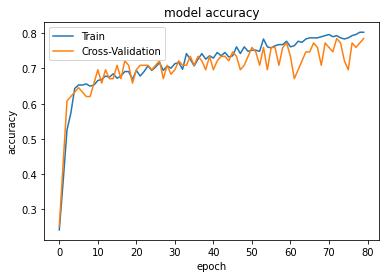

In [450]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()